In [1]:
import scipy
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

In [3]:
import sys
sys.path.insert(0,'..')

In [4]:
from energy_models.particle_dimer import ParticleDimer
from sampling import MetropolisGauss, UmbrellaModel, UmbrellaSampling, HungarianMapper

# 10% lower density
We increase box dimension by 5% so that we increase its area by ~10%. Since we keep number of particles the same, their density decreases approximately by the same ratio. 

In [5]:
# Create model
params_ld = ParticleDimer.default_params.copy()
params_ld['box_halfsize'] *= 1 + (0.05 / 2)
model_ld= ParticleDimer(params=params_ld)
print(model_ld.params)

{'n_solvent': 36, 'eps': 1.0, 'rm': 1.1, 'dimer_slope': 2, 'dimer_a': 25.0, 'dimer_b': 10.0, 'dimer_dmid': 1.5, 'dimer_k': 20.0, 'box_halfsize': 3.0749999999999997, 'box_k': 100.0, 'grid_k': 0.0}


### Plot dimer energy profile

(-2.0, 22.0)

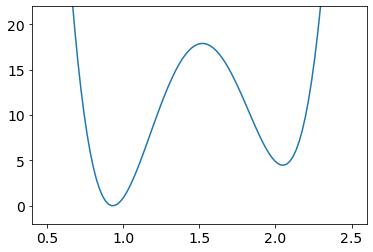

In [6]:
x_scan = np.linspace(0.5, 2.5, 100)
E_scan = model_ld.dimer_energy(np.array([1.5-0.5*x_scan, np.zeros(100), 1.5+0.5*x_scan, np.zeros(100)]).T)
E_scan -= E_scan.min()
plt.plot(x_scan, E_scan)
plt.ylim(-2, 22)

### Plot system

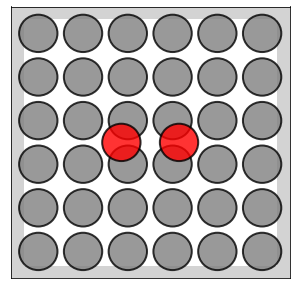

In [7]:
model_ld.draw_config(1.05*model_ld.init_positions(1.5), dimer_color='red', alpha=0.8)

## Determine optimal length of MC step for best efficiency
- This section can be skipped if step is already determined.
- We use narrower interval than when simulating standard density, as we already have some info (sigma = 0.02 was optimal then).

In [8]:
x0 = model_ld.init_positions(0.7)
msd = []
sigmas = np.arange(0.010, 0.035, 0.001)
for sigma in sigmas:
    print("Sigma:", sigma)
    sampler = MetropolisGauss(model_ld, x0, sigma_metro=sigma, burn_in=10000, stride=1)
    sampler.run(100000, verbose=10000)
    msd.append(np.mean((sampler.trajectory[1:] - sampler.trajectory[:-1])**2))    

Sigma: 0.01
Step 0 / 100000
Step 10000 / 100000
Step 20000 / 100000
Step 30000 / 100000
Step 40000 / 100000
Step 50000 / 100000
Step 60000 / 100000
Step 70000 / 100000
Step 80000 / 100000
Step 90000 / 100000
Sigma: 0.011
Step 0 / 100000
Step 10000 / 100000
Step 20000 / 100000
Step 30000 / 100000
Step 40000 / 100000
Step 50000 / 100000
Step 60000 / 100000
Step 70000 / 100000
Step 80000 / 100000
Step 90000 / 100000
Sigma: 0.011999999999999999
Step 0 / 100000
Step 10000 / 100000
Step 20000 / 100000
Step 30000 / 100000
Step 40000 / 100000
Step 50000 / 100000
Step 60000 / 100000
Step 70000 / 100000
Step 80000 / 100000
Step 90000 / 100000
Sigma: 0.012999999999999998
Step 0 / 100000
Step 10000 / 100000
Step 20000 / 100000
Step 30000 / 100000
Step 40000 / 100000
Step 50000 / 100000
Step 60000 / 100000
Step 70000 / 100000
Step 80000 / 100000
Step 90000 / 100000
Sigma: 0.013999999999999997
Step 0 / 100000
Step 10000 / 100000
Step 20000 / 100000
Step 30000 / 100000
Step 40000 / 100000
Step 50000 

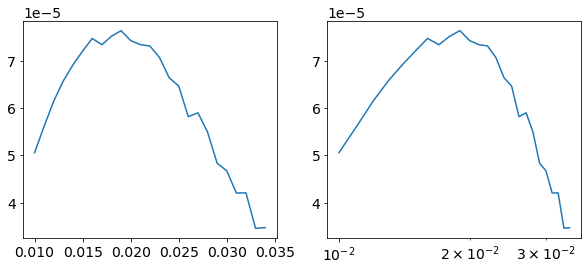

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].plot(sigmas, msd)
axes[1].plot(sigmas, msd)
axes[1].set_xscale("log")

## Evaluate free energy with Umbrella Sampling

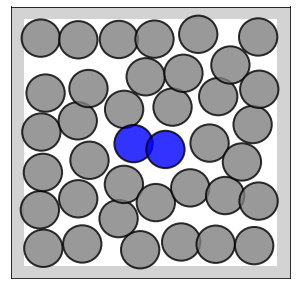

In [10]:
# Create sampler
x0 = model_ld.init_positions(1.0)
sampler = MetropolisGauss(model_ld, x0, sigma_metro=0.02, burn_in=10000, stride=10)
# Relax initial position
sampler.run(10000)
x0 = sampler.x.copy()
# Show relaxed position
model_ld.draw_config(x0, dimer_color='blue', alpha=0.8)

In [11]:
# Umbrella sampling
us_ld = UmbrellaSampling(model_ld, sampler, model_ld.dimer_distance, x0, 35, 1000, 0.5, 2.5, forward_backward=True)
us_ld.run(n_steps=50000, verbose=True)
umbrella_positions_ld = us_ld.umbrella_positions
umbrella_pmf_ld = us_ld.umbrella_free_energies()

Umbrella 1 / 70
Umbrella 2 / 70
Umbrella 3 / 70
Umbrella 4 / 70
Umbrella 5 / 70
Umbrella 6 / 70
Umbrella 7 / 70
Umbrella 8 / 70
Umbrella 9 / 70
Umbrella 10 / 70
Umbrella 11 / 70
Umbrella 12 / 70
Umbrella 13 / 70
Umbrella 14 / 70
Umbrella 15 / 70
Umbrella 16 / 70
Umbrella 17 / 70
Umbrella 18 / 70
Umbrella 19 / 70
Umbrella 20 / 70
Umbrella 21 / 70
Umbrella 22 / 70
Umbrella 23 / 70
Umbrella 24 / 70
Umbrella 25 / 70
Umbrella 26 / 70
Umbrella 27 / 70
Umbrella 28 / 70
Umbrella 29 / 70
Umbrella 30 / 70
Umbrella 31 / 70
Umbrella 32 / 70
Umbrella 33 / 70
Umbrella 34 / 70
Umbrella 35 / 70
Umbrella 36 / 70
Umbrella 37 / 70
Umbrella 38 / 70
Umbrella 39 / 70
Umbrella 40 / 70
Umbrella 41 / 70
Umbrella 42 / 70
Umbrella 43 / 70
Umbrella 44 / 70
Umbrella 45 / 70
Umbrella 46 / 70
Umbrella 47 / 70
Umbrella 48 / 70
Umbrella 49 / 70
Umbrella 50 / 70
Umbrella 51 / 70
Umbrella 52 / 70
Umbrella 53 / 70
Umbrella 54 / 70
Umbrella 55 / 70
Umbrella 56 / 70
Umbrella 57 / 70
Umbrella 58 / 70
Umbrella 59 / 70
Umbrel

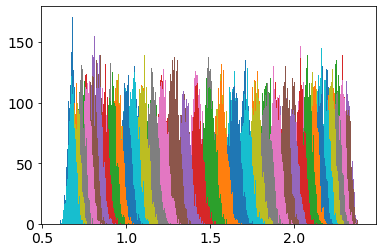

In [12]:
for umbrella_dtraj in us_ld.rc_trajectories:
    plt.hist(umbrella_dtraj, 100);

In [13]:
mbar_positions_ld, mbar_pmf_ld = us_ld.mbar(0.5, 2.5, 35, max_error=1e-3)

../sampling.py:296: RuntimeWarning: divide by zero encountered in log
  F = -np.log(F)


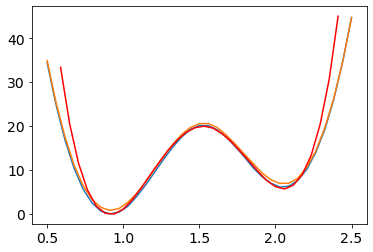

In [14]:
plt.plot(umbrella_positions_ld[:35], umbrella_pmf_ld[:35] - umbrella_pmf_ld.min())
plt.plot(umbrella_positions_ld[35:], umbrella_pmf_ld[35:] - umbrella_pmf_ld.min())
plt.plot(mbar_positions_ld, mbar_pmf_ld - mbar_pmf_ld.min(), color='red')

## Sample training dataset

In [15]:
def plot_trajectory(etraj, traj):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].plot(etraj)
    axes[0].set_xlabel('Timestep')
    axes[0].set_ylabel('Energy')
    # Dimer distance
    d_traj = np.sqrt((traj[:, 2] - traj[:, 0])**2 + (traj[:, 3] - traj[:, 1])**2)
    axes[1].plot(d_traj)
    axes[1].set_xlabel('Timestep')
    axes[1].set_ylabel('Dimer distance')    
    plt.tight_layout()

In [16]:
n_steps = 5000000
stride = 100
sigma_metro = 0.02
burn_in = 10000
d_closed = 1.0
d_open = 2.0
print_stride = 100000

### Dimer in closed state

In [17]:
# Sample closed
x0 = model_ld.init_positions(d_closed)
sampler_closed_ld = MetropolisGauss(model_ld, x0, sigma_metro=sigma_metro, burn_in=burn_in, stride=stride)
sampler_closed_ld.run(n_steps, verbose=print_stride)

Step 0 / 5000000
Step 100000 / 5000000
Step 200000 / 5000000
Step 300000 / 5000000
Step 400000 / 5000000
Step 500000 / 5000000
Step 600000 / 5000000
Step 700000 / 5000000
Step 800000 / 5000000
Step 900000 / 5000000
Step 1000000 / 5000000
Step 1100000 / 5000000
Step 1200000 / 5000000
Step 1300000 / 5000000
Step 1400000 / 5000000
Step 1500000 / 5000000
Step 1600000 / 5000000
Step 1700000 / 5000000
Step 1800000 / 5000000
Step 1900000 / 5000000
Step 2000000 / 5000000
Step 2100000 / 5000000
Step 2200000 / 5000000
Step 2300000 / 5000000
Step 2400000 / 5000000
Step 2500000 / 5000000
Step 2600000 / 5000000
Step 2700000 / 5000000
Step 2800000 / 5000000
Step 2900000 / 5000000
Step 3000000 / 5000000
Step 3100000 / 5000000
Step 3200000 / 5000000
Step 3300000 / 5000000
Step 3400000 / 5000000
Step 3500000 / 5000000
Step 3600000 / 5000000
Step 3700000 / 5000000
Step 3800000 / 5000000
Step 3900000 / 5000000
Step 4000000 / 5000000
Step 4100000 / 5000000
Step 4200000 / 5000000
Step 4300000 / 5000000
Ste

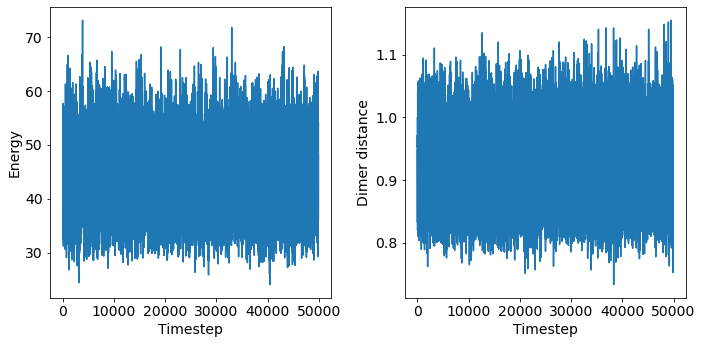

In [18]:
plot_trajectory(sampler_closed_ld.energy_trajectory, sampler_closed_ld.trajectory)

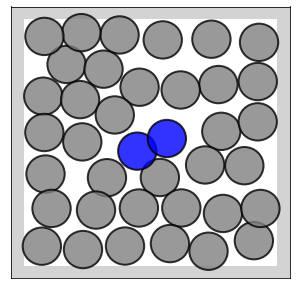

In [19]:
model_ld.draw_config(sampler_closed_ld.trajectory[-1], dimer_color='blue', alpha=0.8)

In [20]:
# Sample again for test dataset
x0 = model_ld.init_positions(d_closed)
sampler_closed_ld2 = MetropolisGauss(model_ld, x0, sigma_metro=sigma_metro, burn_in=burn_in, stride=stride)
sampler_closed_ld2.run(n_steps, verbose=print_stride)

Step 0 / 5000000
Step 100000 / 5000000
Step 200000 / 5000000
Step 300000 / 5000000
Step 400000 / 5000000
Step 500000 / 5000000
Step 600000 / 5000000
Step 700000 / 5000000
Step 800000 / 5000000
Step 900000 / 5000000
Step 1000000 / 5000000
Step 1100000 / 5000000
Step 1200000 / 5000000
Step 1300000 / 5000000
Step 1400000 / 5000000
Step 1500000 / 5000000
Step 1600000 / 5000000
Step 1700000 / 5000000
Step 1800000 / 5000000
Step 1900000 / 5000000
Step 2000000 / 5000000
Step 2100000 / 5000000
Step 2200000 / 5000000
Step 2300000 / 5000000
Step 2400000 / 5000000
Step 2500000 / 5000000
Step 2600000 / 5000000
Step 2700000 / 5000000
Step 2800000 / 5000000
Step 2900000 / 5000000
Step 3000000 / 5000000
Step 3100000 / 5000000
Step 3200000 / 5000000
Step 3300000 / 5000000
Step 3400000 / 5000000
Step 3500000 / 5000000
Step 3600000 / 5000000
Step 3700000 / 5000000
Step 3800000 / 5000000
Step 3900000 / 5000000
Step 4000000 / 5000000
Step 4100000 / 5000000
Step 4200000 / 5000000
Step 4300000 / 5000000
Ste

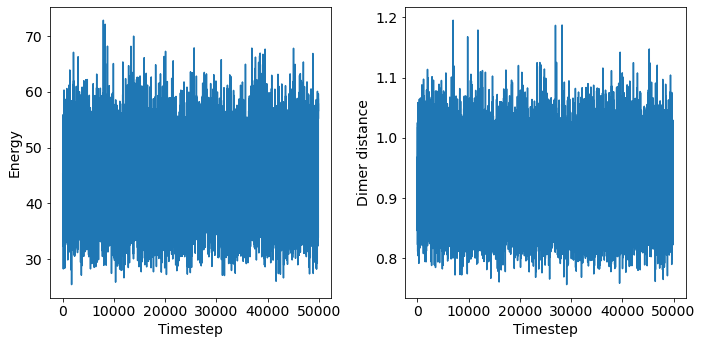

In [21]:
plot_trajectory(sampler_closed_ld2.energy_trajectory, sampler_closed_ld2.trajectory)

### Dimer in opened state

In [22]:
# Sample 
x0 = model_ld.init_positions(d_open)
sampler_open_ld = MetropolisGauss(model_ld, x0, sigma_metro=sigma_metro, burn_in=burn_in, stride=stride)
sampler_open_ld.run(n_steps, verbose=print_stride)

Step 0 / 5000000
Step 100000 / 5000000
Step 200000 / 5000000
Step 300000 / 5000000
Step 400000 / 5000000
Step 500000 / 5000000
Step 600000 / 5000000
Step 700000 / 5000000
Step 800000 / 5000000
Step 900000 / 5000000
Step 1000000 / 5000000
Step 1100000 / 5000000
Step 1200000 / 5000000
Step 1300000 / 5000000
Step 1400000 / 5000000
Step 1500000 / 5000000
Step 1600000 / 5000000
Step 1700000 / 5000000
Step 1800000 / 5000000
Step 1900000 / 5000000
Step 2000000 / 5000000
Step 2100000 / 5000000
Step 2200000 / 5000000
Step 2300000 / 5000000
Step 2400000 / 5000000
Step 2500000 / 5000000
Step 2600000 / 5000000
Step 2700000 / 5000000
Step 2800000 / 5000000
Step 2900000 / 5000000
Step 3000000 / 5000000
Step 3100000 / 5000000
Step 3200000 / 5000000
Step 3300000 / 5000000
Step 3400000 / 5000000
Step 3500000 / 5000000
Step 3600000 / 5000000
Step 3700000 / 5000000
Step 3800000 / 5000000
Step 3900000 / 5000000
Step 4000000 / 5000000
Step 4100000 / 5000000
Step 4200000 / 5000000
Step 4300000 / 5000000
Ste

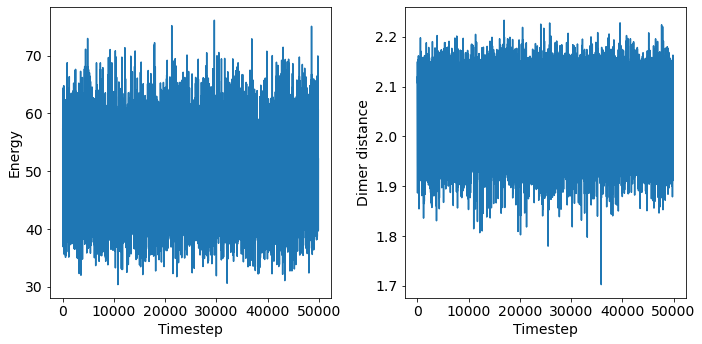

In [23]:
plot_trajectory(sampler_open_ld.energy_trajectory, sampler_open_ld.trajectory)

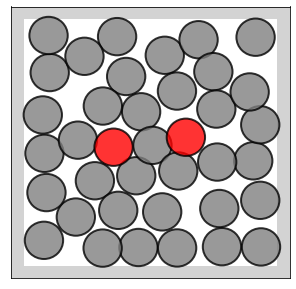

In [29]:
model_ld.draw_config(sampler_open_ld.trajectory[-1], dimer_color='red', alpha=0.8);

In [25]:
# Sample again for test dataset
x0 = model_ld.init_positions(d_open)
sampler_open_ld2 = MetropolisGauss(model_ld, x0, sigma_metro=sigma_metro, burn_in=burn_in, stride=stride)
sampler_open_ld2.run(n_steps, verbose=print_stride)

Step 0 / 5000000
Step 100000 / 5000000
Step 200000 / 5000000
Step 300000 / 5000000
Step 400000 / 5000000
Step 500000 / 5000000
Step 600000 / 5000000
Step 700000 / 5000000
Step 800000 / 5000000
Step 900000 / 5000000
Step 1000000 / 5000000
Step 1100000 / 5000000
Step 1200000 / 5000000
Step 1300000 / 5000000
Step 1400000 / 5000000
Step 1500000 / 5000000
Step 1600000 / 5000000
Step 1700000 / 5000000
Step 1800000 / 5000000
Step 1900000 / 5000000
Step 2000000 / 5000000
Step 2100000 / 5000000
Step 2200000 / 5000000
Step 2300000 / 5000000
Step 2400000 / 5000000
Step 2500000 / 5000000
Step 2600000 / 5000000
Step 2700000 / 5000000
Step 2800000 / 5000000
Step 2900000 / 5000000
Step 3000000 / 5000000
Step 3100000 / 5000000
Step 3200000 / 5000000
Step 3300000 / 5000000
Step 3400000 / 5000000
Step 3500000 / 5000000
Step 3600000 / 5000000
Step 3700000 / 5000000
Step 3800000 / 5000000
Step 3900000 / 5000000
Step 4000000 / 5000000
Step 4100000 / 5000000
Step 4200000 / 5000000
Step 4300000 / 5000000
Ste

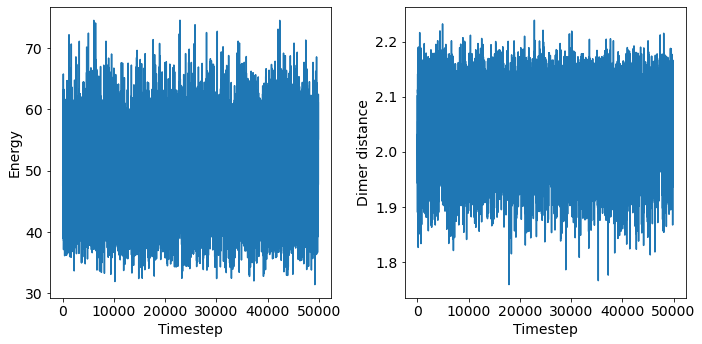

In [26]:
plot_trajectory(sampler_open_ld2.energy_trajectory, sampler_open_ld2.trajectory)

Text(0, 0.5, 'Probability')

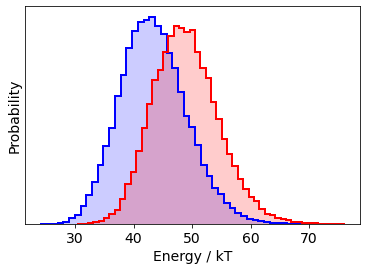

In [27]:
plt.hist(sampler_closed_ld.energy_trajectory, 50, histtype='stepfilled', color='blue', alpha=0.2);
plt.hist(sampler_closed_ld.energy_trajectory, 50, histtype='step', color='blue', linewidth=2);
plt.hist(sampler_open_ld.energy_trajectory, 50, histtype='stepfilled', color='red', alpha=0.2);
plt.hist(sampler_open_ld.energy_trajectory, 50, histtype='step', color='red', linewidth=2);
plt.xlabel('Energy / kT')
plt.yticks([])
plt.ylabel('Probability')

Text(0.5, 0, 'Probability')

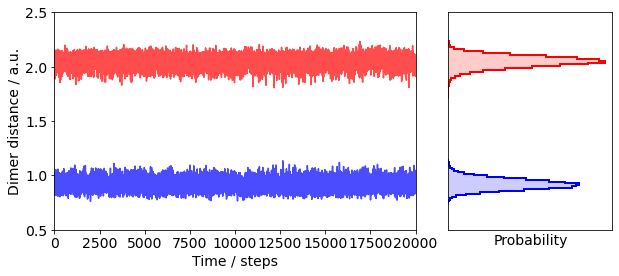

In [31]:
plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((1, 3), (0, 2))
ax1.plot(model_ld.dimer_distance(sampler_closed_ld.trajectory), color='blue', alpha=0.7)
ax1.plot(model_ld.dimer_distance(sampler_open_ld.trajectory), color='red', alpha=0.7)
ax1.set_xlim(0, 20000)
ax1.set_ylim(0.5, 2.5)
ax1.set_xlabel('Time / steps')
ax1.set_ylabel('Dimer distance / a.u.')
ax2.hist(model_ld.dimer_distance(sampler_closed_ld.trajectory), 30, orientation='horizontal', histtype='stepfilled', color='blue', alpha=0.2);
ax2.hist(model_ld.dimer_distance(sampler_closed_ld.trajectory), 30, orientation='horizontal', histtype='step', color='blue', linewidth=2);
ax2.hist(model_ld.dimer_distance(sampler_open_ld.trajectory), 30, orientation='horizontal', histtype='stepfilled', color='red', alpha=0.2);
ax2.hist(model_ld.dimer_distance(sampler_open_ld.trajectory), 30, orientation='horizontal', histtype='step', color='red', linewidth=2);
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(0.5, 2.5)
ax2.set_xlabel('Probability')

### Check dimer swaps
Check that dimer particles have not exchanged their positions.

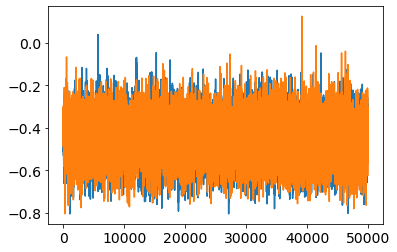

In [32]:
plt.plot(sampler_closed_ld.trajectory[:, 0])
plt.plot(sampler_closed_ld2.trajectory[:, 0])

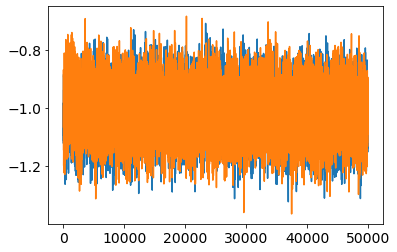

In [33]:
plt.plot(sampler_open_ld.trajectory[:, 0])
plt.plot(sampler_open_ld2.trajectory[:, 0])

# 10% higher density
We decrease box dimension by 5% so that we decrease its area by ~10%. Since we keep number of particles the same, their density increases by the same ratio. 

In [34]:
# Create model
params_hd = ParticleDimer.default_params.copy()
params_hd['box_halfsize'] *= 1 - (0.05 / 2)
model_hd= ParticleDimer(params=params_hd)
sigma_metro = 0.015
print(model_hd.params)

{'n_solvent': 36, 'eps': 1.0, 'rm': 1.1, 'dimer_slope': 2, 'dimer_a': 25.0, 'dimer_b': 10.0, 'dimer_dmid': 1.5, 'dimer_k': 20.0, 'box_halfsize': 2.925, 'box_k': 100.0, 'grid_k': 0.0}


## Plot dimer energy profile

(-2.0, 22.0)

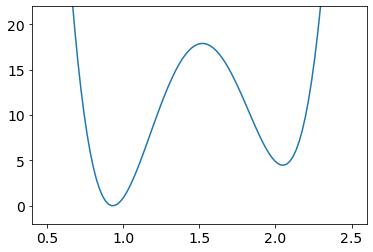

In [35]:
x_scan = np.linspace(0.5, 2.5, 100)
E_scan = model_hd.dimer_energy(np.array([1.5-0.5*x_scan, np.zeros(100), 1.5+0.5*x_scan, np.zeros(100)]).T)
E_scan -= E_scan.min()
plt.plot(x_scan, E_scan)
plt.ylim(-2, 22)

### Plot system

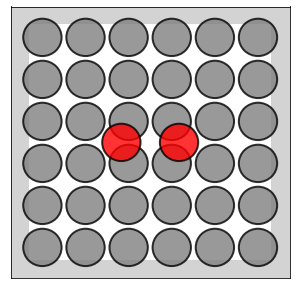

In [36]:
model_hd.draw_config(1.05*model_hd.init_positions(1.5), dimer_color='red', alpha=0.8)

### Determine optimal length of MC step for best efficiency
- This section can be skipped if step is already determined.
- We use narrower interval than when simulating standard density, as we already have some info (sigma = 0.02 was optimal then).

In [37]:
x0 = model_hd.init_positions(0.7)
msd = []
sigmas = np.arange(0.010, 0.035, 0.001)
for sigma in sigmas:
    print("Sigma:", sigma)
    sampler = MetropolisGauss(model_hd, x0, sigma_metro=sigma, burn_in=10000, stride=1)
    sampler.run(100000, verbose=10000)
    msd.append(np.mean((sampler.trajectory[1:] - sampler.trajectory[:-1])**2))    

Sigma: 0.01
Step 0 / 100000
Step 10000 / 100000
Step 20000 / 100000
Step 30000 / 100000
Step 40000 / 100000
Step 50000 / 100000
Step 60000 / 100000
Step 70000 / 100000
Step 80000 / 100000
Step 90000 / 100000
Sigma: 0.011
Step 0 / 100000
Step 10000 / 100000
Step 20000 / 100000
Step 30000 / 100000
Step 40000 / 100000
Step 50000 / 100000
Step 60000 / 100000
Step 70000 / 100000
Step 80000 / 100000
Step 90000 / 100000
Sigma: 0.011999999999999999
Step 0 / 100000
Step 10000 / 100000
Step 20000 / 100000
Step 30000 / 100000
Step 40000 / 100000
Step 50000 / 100000
Step 60000 / 100000
Step 70000 / 100000
Step 80000 / 100000
Step 90000 / 100000
Sigma: 0.012999999999999998
Step 0 / 100000
Step 10000 / 100000
Step 20000 / 100000
Step 30000 / 100000
Step 40000 / 100000
Step 50000 / 100000
Step 60000 / 100000
Step 70000 / 100000
Step 80000 / 100000
Step 90000 / 100000
Sigma: 0.013999999999999997
Step 0 / 100000
Step 10000 / 100000
Step 20000 / 100000
Step 30000 / 100000
Step 40000 / 100000
Step 50000 

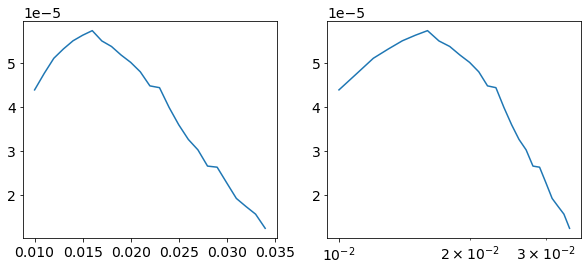

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].plot(sigmas, msd)
axes[1].plot(sigmas, msd)
axes[1].set_xscale("log")

### Evaluate free energy with Umbrella Sampling

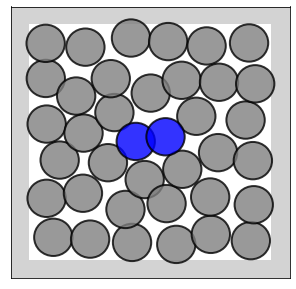

In [39]:
# Create sampler
x0 = model_hd.init_positions(1.0)
sampler = MetropolisGauss(model_hd, x0, sigma_metro=0.015, burn_in=10000, stride=10)
# Relax initial position
sampler.run(10000)
x0 = sampler.x.copy()
# Show relaxed position
model_hd.draw_config(x0, dimer_color='blue', alpha=0.8)

In [40]:
# Umbrella sampling
us_hd = UmbrellaSampling(model_hd, sampler, model_hd.dimer_distance, x0, 35, 1000, 0.5, 2.5, forward_backward=True)
us_hd.run(n_steps=50000, verbose=True)
umbrella_positions_hd = us_hd.umbrella_positions
umbrella_pmf_hd = us_hd.umbrella_free_energies()

Umbrella 1 / 70
Umbrella 2 / 70
Umbrella 3 / 70
Umbrella 4 / 70
Umbrella 5 / 70
Umbrella 6 / 70
Umbrella 7 / 70
Umbrella 8 / 70
Umbrella 9 / 70
Umbrella 10 / 70
Umbrella 11 / 70
Umbrella 12 / 70
Umbrella 13 / 70
Umbrella 14 / 70
Umbrella 15 / 70
Umbrella 16 / 70
Umbrella 17 / 70
Umbrella 18 / 70
Umbrella 19 / 70
Umbrella 20 / 70
Umbrella 21 / 70
Umbrella 22 / 70
Umbrella 23 / 70
Umbrella 24 / 70
Umbrella 25 / 70
Umbrella 26 / 70
Umbrella 27 / 70
Umbrella 28 / 70
Umbrella 29 / 70
Umbrella 30 / 70
Umbrella 31 / 70
Umbrella 32 / 70
Umbrella 33 / 70
Umbrella 34 / 70
Umbrella 35 / 70
Umbrella 36 / 70
Umbrella 37 / 70
Umbrella 38 / 70
Umbrella 39 / 70
Umbrella 40 / 70
Umbrella 41 / 70
Umbrella 42 / 70
Umbrella 43 / 70
Umbrella 44 / 70
Umbrella 45 / 70
Umbrella 46 / 70
Umbrella 47 / 70
Umbrella 48 / 70
Umbrella 49 / 70
Umbrella 50 / 70
Umbrella 51 / 70
Umbrella 52 / 70
Umbrella 53 / 70
Umbrella 54 / 70
Umbrella 55 / 70
Umbrella 56 / 70
Umbrella 57 / 70
Umbrella 58 / 70
Umbrella 59 / 70
Umbrel

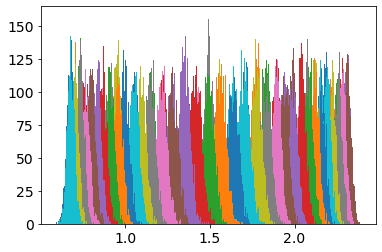

In [41]:
for umbrella_dtraj in us_hd.rc_trajectories:
    plt.hist(umbrella_dtraj, 100);

We run MBAR instead of simple BAR, as we expect higher error.

In [42]:
mbar_positions_hd, mbar_pmf_hd = us_hd.mbar(0.5, 2.5, 35, max_error=1e-3)

../sampling.py:296: RuntimeWarning: divide by zero encountered in log
  F = -np.log(F)


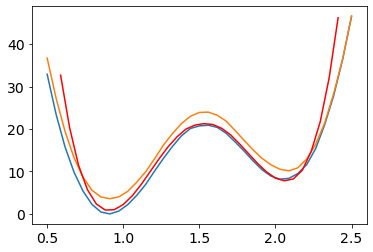

In [43]:
plt.plot(umbrella_positions_hd[:35], umbrella_pmf_hd[:35] - umbrella_pmf_hd.min())
plt.plot(umbrella_positions_hd[35:], umbrella_pmf_hd[35:] - umbrella_pmf_hd.min())
plt.plot(mbar_positions_hd, mbar_pmf_hd, color='red')

## Sample training dataset

### Dimer in closed state

In [44]:
# Sample closed
x0 = model_hd.init_positions(d_closed)
sampler_closed_hd = MetropolisGauss(model_hd, x0, sigma_metro=sigma_metro, burn_in=burn_in, stride=stride)
sampler_closed_hd.run(n_steps, verbose=print_stride)

Step 0 / 5000000
Step 100000 / 5000000
Step 200000 / 5000000
Step 300000 / 5000000
Step 400000 / 5000000
Step 500000 / 5000000
Step 600000 / 5000000
Step 700000 / 5000000
Step 800000 / 5000000
Step 900000 / 5000000
Step 1000000 / 5000000
Step 1100000 / 5000000
Step 1200000 / 5000000
Step 1300000 / 5000000
Step 1400000 / 5000000
Step 1500000 / 5000000
Step 1600000 / 5000000
Step 1700000 / 5000000
Step 1800000 / 5000000
Step 1900000 / 5000000
Step 2000000 / 5000000
Step 2100000 / 5000000
Step 2200000 / 5000000
Step 2300000 / 5000000
Step 2400000 / 5000000
Step 2500000 / 5000000
Step 2600000 / 5000000
Step 2700000 / 5000000
Step 2800000 / 5000000
Step 2900000 / 5000000
Step 3000000 / 5000000
Step 3100000 / 5000000
Step 3200000 / 5000000
Step 3300000 / 5000000
Step 3400000 / 5000000
Step 3500000 / 5000000
Step 3600000 / 5000000
Step 3700000 / 5000000
Step 3800000 / 5000000
Step 3900000 / 5000000
Step 4000000 / 5000000
Step 4100000 / 5000000
Step 4200000 / 5000000
Step 4300000 / 5000000
Ste

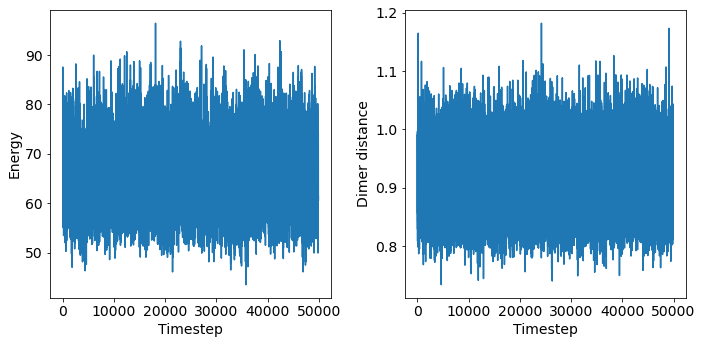

In [45]:
plot_trajectory(sampler_closed_hd.energy_trajectory, sampler_closed_hd.trajectory)

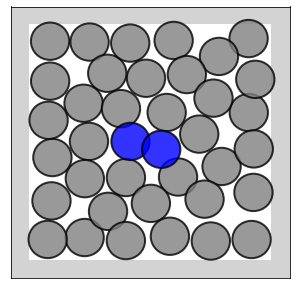

In [46]:
model_hd.draw_config(sampler_closed_hd.trajectory[-1], dimer_color='blue', alpha=0.8)

In [47]:
# Sample again for test dataset
x0 = model_hd.init_positions(d_closed)
sampler_closed_hd2 = MetropolisGauss(model_hd, x0, sigma_metro=sigma_metro, burn_in=burn_in, stride=stride)
sampler_closed_hd2.run(n_steps, verbose=print_stride)

Step 0 / 5000000
Step 100000 / 5000000
Step 200000 / 5000000
Step 300000 / 5000000
Step 400000 / 5000000
Step 500000 / 5000000
Step 600000 / 5000000
Step 700000 / 5000000
Step 800000 / 5000000
Step 900000 / 5000000
Step 1000000 / 5000000
Step 1100000 / 5000000
Step 1200000 / 5000000
Step 1300000 / 5000000
Step 1400000 / 5000000
Step 1500000 / 5000000
Step 1600000 / 5000000
Step 1700000 / 5000000
Step 1800000 / 5000000
Step 1900000 / 5000000
Step 2000000 / 5000000
Step 2100000 / 5000000
Step 2200000 / 5000000
Step 2300000 / 5000000
Step 2400000 / 5000000
Step 2500000 / 5000000
Step 2600000 / 5000000
Step 2700000 / 5000000
Step 2800000 / 5000000
Step 2900000 / 5000000
Step 3000000 / 5000000
Step 3100000 / 5000000
Step 3200000 / 5000000
Step 3300000 / 5000000
Step 3400000 / 5000000
Step 3500000 / 5000000
Step 3600000 / 5000000
Step 3700000 / 5000000
Step 3800000 / 5000000
Step 3900000 / 5000000
Step 4000000 / 5000000
Step 4100000 / 5000000
Step 4200000 / 5000000
Step 4300000 / 5000000
Ste

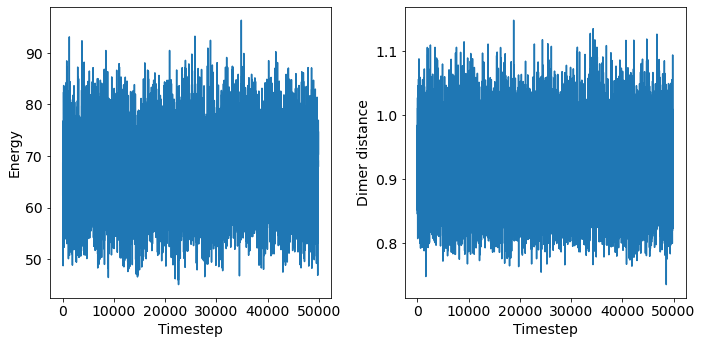

In [48]:
plot_trajectory(sampler_closed_hd2.energy_trajectory, sampler_closed_hd2.trajectory)

### Dimer in opened state

In [ ]:
# Sample 
x0 = model_hd.init_positions(d_open)
sampler_open_hd = MetropolisGauss(model_hd, x0, sigma_metro=sigma_metro, burn_in=burn_in, stride=stride)
sampler_open_hd.run(n_steps, verbose=print_stride)

Step 0 / 5000000
Step 100000 / 5000000
Step 200000 / 5000000
Step 300000 / 5000000
Step 400000 / 5000000


In [ ]:
plot_trajectory(sampler_open_hd.energy_trajectory, sampler_open_hd.trajectory)

In [ ]:
model_hd.draw_config(sampler_open_hd.trajectory[-1], dimer_color='red', alpha=0.8);

In [49]:
# Sample again for test dataset
x0 = model_hd.init_positions(d_open)
sampler_open_hd2 = MetropolisGauss(model_hd, x0, sigma_metro=sigma_metro, burn_in=burn_in, stride=stride)
sampler_open_hd2.run(n_steps, verbose=print_stride)

Step 0 / 5000000
Step 100000 / 5000000
Step 200000 / 5000000
Step 300000 / 5000000
Step 400000 / 5000000
Step 500000 / 5000000
Step 600000 / 5000000
Step 700000 / 5000000
Step 800000 / 5000000
Step 900000 / 5000000
Step 1000000 / 5000000
Step 1100000 / 5000000
Step 1200000 / 5000000
Step 1300000 / 5000000
Step 1400000 / 5000000
Step 1500000 / 5000000
Step 1600000 / 5000000
Step 1700000 / 5000000
Step 1800000 / 5000000
Step 1900000 / 5000000
Step 2000000 / 5000000
Step 2100000 / 5000000
Step 2200000 / 5000000
Step 2300000 / 5000000
Step 2400000 / 5000000
Step 2500000 / 5000000
Step 2600000 / 5000000
Step 2700000 / 5000000
Step 2800000 / 5000000
Step 2900000 / 5000000
Step 3000000 / 5000000
Step 3100000 / 5000000
Step 3200000 / 5000000
Step 3300000 / 5000000
Step 3400000 / 5000000
Step 3500000 / 5000000
Step 3600000 / 5000000
Step 3700000 / 5000000
Step 3800000 / 5000000
Step 3900000 / 5000000
Step 4000000 / 5000000
Step 4100000 / 5000000
Step 4200000 / 5000000
Step 4300000 / 5000000
Ste

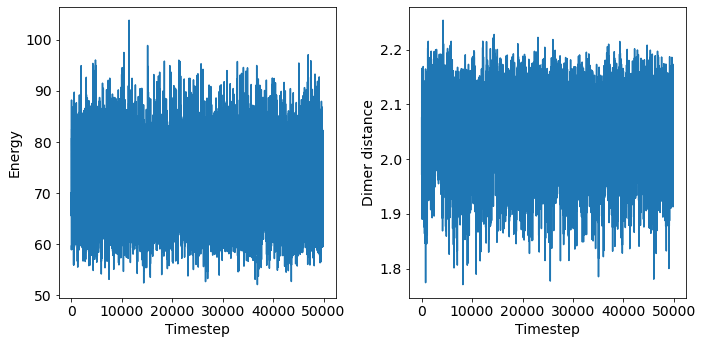

In [50]:
plot_trajectory(sampler_open_hd2.energy_trajectory, sampler_open_hd2.trajectory)

Text(0, 0.5, 'Probability')

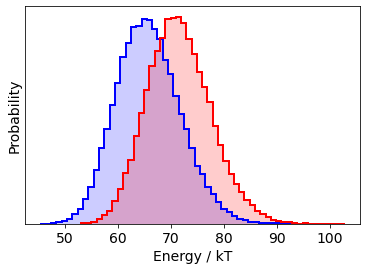

In [51]:
plt.hist(sampler_closed_hd.energy_trajectory, 50, histtype='stepfilled', color='blue', alpha=0.2);
plt.hist(sampler_closed_hd.energy_trajectory, 50, histtype='step', color='blue', linewidth=2);
plt.hist(sampler_open_hd.energy_trajectory, 50, histtype='stepfilled', color='red', alpha=0.2);
plt.hist(sampler_open_hd.energy_trajectory, 50, histtype='step', color='red', linewidth=2);
plt.xlabel('Energy / kT')
plt.yticks([])
plt.ylabel('Probability')

Text(0.5, 0, 'Probability')

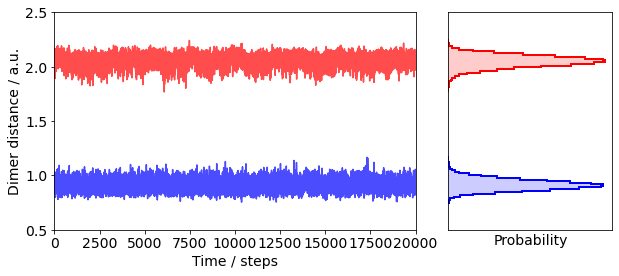

In [52]:
plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((1, 3), (0, 2))
ax1.plot(model_hd.dimer_distance(sampler_closed_hd.trajectory), color='blue', alpha=0.7)
ax1.plot(model_hd.dimer_distance(sampler_open_hd.trajectory), color='red', alpha=0.7)
ax1.set_xlim(0, 20000)
ax1.set_ylim(0.5, 2.5)
ax1.set_xlabel('Time / steps')
ax1.set_ylabel('Dimer distance / a.u.')
ax2.hist(model_hd.dimer_distance(sampler_closed_hd.trajectory), 30, orientation='horizontal', histtype='stepfilled', color='blue', alpha=0.2);
ax2.hist(model_hd.dimer_distance(sampler_closed_hd.trajectory), 30, orientation='horizontal', histtype='step', color='blue', linewidth=2);
ax2.hist(model_hd.dimer_distance(sampler_open_hd.trajectory), 30, orientation='horizontal', histtype='stepfilled', color='red', alpha=0.2);
ax2.hist(model_hd.dimer_distance(sampler_open_hd.trajectory), 30, orientation='horizontal', histtype='step', color='red', linewidth=2);
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(0.5, 2.5)
ax2.set_xlabel('Probability')

### Check dimer swaps
Check that dimer particles have not exchanged their positions.

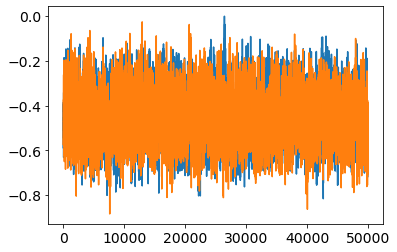

In [53]:
plt.plot(sampler_closed_hd.trajectory[:, 0])
plt.plot(sampler_closed_hd2.trajectory[:, 0])

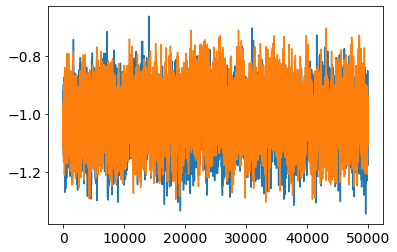

In [54]:
plt.plot(sampler_open_hd.trajectory[:, 0])
plt.plot(sampler_open_hd2.trajectory[:, 0])

## Particle permutation identity

In [55]:
mapper_ld = HungarianMapper(
    1.05*model_ld.init_positions(1.5), 
    dim=2, 
    identical_particles=np.arange(2, model_ld.n_particles)
)

mapper_hd = HungarianMapper(
    1.05*model_hd.init_positions(1.5), 
    dim=2, 
    identical_particles=np.arange(2, model_hd.n_particles)
)

Remove particle diffusion.

In [57]:
ld_traj_closed_train_hungarian = mapper_ld.map(sampler_closed_ld.trajectory)
ld_traj_open_train_hungarian = mapper_ld.map(sampler_open_ld.trajectory)
ld_traj_closed_test_hungarian = mapper_ld.map(sampler_closed_ld2.trajectory)
ld_traj_open_test_hungarian = mapper_ld.map(sampler_open_ld2.trajectory)

hd_traj_closed_train_hungarian = mapper_hd.map(sampler_closed_hd.trajectory)
hd_traj_open_train_hungarian = mapper_hd.map(sampler_open_hd.trajectory)
hd_traj_closed_test_hungarian = mapper_hd.map(sampler_closed_hd2.trajectory)
hd_traj_open_test_hungarian = mapper_hd.map(sampler_open_hd2.trajectory)

Save data
----

In [58]:
# Store trajectory data
trajdict = {}
trajdict['ld_params'] = model_ld.params
trajdict['ld_traj_closed_train'] = sampler_closed_ld.trajectory
trajdict['ld_traj_open_train'] = sampler_open_ld.trajectory
trajdict['ld_traj_closed_train_hungarian'] = ld_traj_closed_train_hungarian
trajdict['ld_traj_open_train_hungarian'] = ld_traj_open_train_hungarian
trajdict['ld_etraj_closed_train'] = sampler_closed_ld.energy_trajectory
trajdict['ld_etraj_open_train'] = sampler_open_ld.energy_trajectory
trajdict['ld_traj_closed_test'] = sampler_closed2_ld.trajectory
trajdict['ld_traj_open_test'] = sampler_open2_ld.trajectory
trajdict['ld_traj_closed_test_hungarian'] = ld_traj_closed_test_hungarian
trajdict['ld_traj_open_test_hungarian'] = ld_traj_open_test_hungarian
trajdict['ld_etraj_closed_test'] = sampler_closed_ld2.energy_trajectory
trajdict['ld_etraj_open_test'] = sampler_open_ld2.energy_trajectory

trajdict['hd_params'] = model_hd.params
trajdict['hd_traj_closed_train'] = sampler_closed_hd.trajectory
trajdict['hd_traj_open_train'] = sampler_open_hd.trajectory
trajdict['hd_traj_closed_train_hungarian'] = hd_traj_closed_train_hungarian
trajdict['hd_traj_open_train_hungarian'] = hd_traj_open_train_hungarian
trajdict['hd_etraj_closed_train'] = sampler_closed_hd.energy_trajectory
trajdict['hd_etraj_open_train'] = sampler_open_hd.energy_trajectory
trajdict['hd_traj_closed_test'] = sampler_closed2_hd.trajectory
trajdict['hd_traj_open_test'] = sampler_open2_hd.trajectory
trajdict['hd_traj_closed_test_hungarian'] = hd_traj_closed_test_hungarian
trajdict['hd_traj_open_test_hungarian'] = hd_traj_open_test_hungarian
trajdict['hd_etraj_closed_test'] = sampler_closed_hd2.energy_trajectory
trajdict['hd_etraj_open_test'] = sampler_open_hd2.energy_trajectory

NameError: name 'sampler_closed2_ld' is not defined

In [ ]:
# Store data from umbrella sampling
us_dict = {}
us_dict['umbrella_positions_ld'] = us_ld.umbrella_positions
us_dict['umbrella_FE_ld'] = umbrella_pmf_ld

us_dict['umbrella_positions_hd'] = us_hd.umbrella_positions
us_dict['umbrella_FE_hd'] = umbrella_pmf_hd
us_dict['umbrella_positions_hd_pmf'] = x
us_dict['umbrella_FE_hd_pmf'] = mbar_pmf_hd

In [ ]:
directory = '../resources/'
np.savez_compressed(directory + 'bistable_dimer_changed_density_training_data.npz', **trajdict)
np.savez_compressed(directory + 'bistable_dimer_changed_density_umbrella_sampling_data.npz', **us_dict)